<a href="https://colab.research.google.com/github/ikonthomas/SchoolPlay/blob/master/LDA_Assignment_Peer_Review_Assignment_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Peer Review Assignment 2 - Part II

Name: Thomas Muserepwa

Date: 14/04/2019


## Instructions

* Work through the notebook, answer all questions, and do all problems
* You are allowed to consult the internet, and discuss on the module forum
* Your answers and solutions to the problems should be added to this notebook 
* Submit your final work as an html file
* Note that the solutions to the problems used python version 3.6.4.  

## Marking Scheme (Theoretical Questions)
* All questions are marked out of 3.
* No valid answer: 0 marks
* Demonstration of grasp of basic idea: 1 mark
* 'Perfect' answer: 3 marks

## Marking Scheme (Practical Problems)
* All problems are marked out of 5.
* No valid answer: 0 marks
* Demonstration of grasp of basic idea: 2 mark
* Working code: 5 marks
---


# Linear Discriminant Analysis (LDA)

The PCA encountered in the previous exercise can be viewed as a dimensionality reduction scheme, projecting onto the directions with maximal variance.

LDA is also a dimensionality reduction scheme but operates on a very different principle. Now we are given data that belongs to different classes. We are given both the data value $x$ and a class label $y$ If we have $k$ classes then $y$ will take on $k$ labels, in Python typicall the values 0 through $k-1$. 

The idea is to project the data onto a lower dimensional space in such a way that maximal *class separation* is achieved in the lower dimensional space.

You can learn more about the scikit-learn implementation at http://scikit-learn.org/stable/modules/generated/sklearn.lda.LDA.html

You will investigate the difference between  PCA using the wine data set, for more information see  http://archive.ics.uci.edu/ml/datasets/Wine Since the wine dataset is 13 dimensional the difference between PCA and LDA is more pronounced than say, with the Iris data set. 

We project down to 2 dimensions for easy visualization. In fact, since there are only 3 classes, one does not retain any more information by using higher dimensions.


## Import packages

In [0]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pylab as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Import different modules for using with the notebook
from IPython.display import display
from IPython.display import Image

## Simple example

As a warmup run the example from the scikit-learn website.

In [0]:
# Create synthetic data
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

# Instantiate & fit the model: LDA
clf = LDA()
clf.fit(X, y)

print(clf.predict([[-0.8, -1]]))

[1]


## Loading the data

Read the data, extract the class labels from the last column, then extract the names of the classes using the convenient `set` function in Python. 


In [0]:
# import training data
wine_train = np.loadtxt('./data/wine/wine_train.txt',delimiter = ',')
wine_train_labels = wine_train[:,-1]
wine_train_classes = list(set(wine_train_labels))
wine_train_classes = np.array(wine_train_classes, dtype=int)
wine_train_labels = np.array(wine_train_labels, dtype = int)
wine_train = wine_train[:,:-1]

# import testing data
wine_test = np.loadtxt('./data/wine/wine_test.txt', delimiter = ',')
wine_test_labels = wine_test[:,-1]
wine_test_classes = list(set(wine_test_labels))
wine_test_classes = np.array(wine_test_classes, dtype=int)
wine_test_labels = np.array(wine_test_labels, dtype = int)
wine_test = wine_test[:, :-1]

---

## PCA

### Problem 1: (**5 marks**)

Project the data onto 2 PCA components and display the classes of the dimension-reduced data.

You should see something like:

In [0]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pylab as plt
from sklearn.decomposition import PCA

# import training data
wine_train = np.loadtxt('./data/wine/wine_train.txt',delimiter = ',')
wine_train_labels = wine_train[:,-1]
wine_train_classes = list(set(wine_train_labels))
wine_train_classes = np.array(wine_train_classes, dtype=int)
wine_train_labels = np.array(wine_train_labels, dtype = int)
wine_train = wine_train[:,:-1]

# import testing data
wine_test = np.loadtxt('./data/wine/wine_test.txt', delimiter = ',')
wine_test_labels = wine_test[:,-1]
wine_test_classes = list(set(wine_test_labels))
wine_test_classes = np.array(wine_test_classes, dtype=int)
wine_test_labels = np.array(wine_test_labels, dtype = int)
wine_test = wine_test[:, :-1]

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

traces = []

for name in ('wine'):

    trace = Scatter(
        x=Y_sklearn[y==name,0],
        y=Y_sklearn[y==name,1],
        mode='markers',
        name=name,
        marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
    traces.append(trace)


data = Data(traces)
layout = Layout(xaxis=XAxis(title='PC1', showline=False),
                yaxis=YAxis(title='PC2', showline=False))
fig = Figure(data=data, layout=layout)
py.iplot(fig)

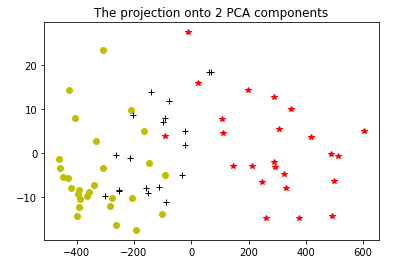

In [0]:
display(Image(filename='./Wine_PCA.png'))

## LDA

### Problem 2:(**5 marks**)

Fit an LDA model to the data, using 2 components and display the different classes of the projected data.

You should see: 

In [0]:
#Importing the relevant packages
import numpy as np  
import pandas as pd  

%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pylab as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# import training data
wine_train = np.loadtxt('./data/wine/wine_train.txt',delimiter = ',')
wine_train_labels = wine_train[:,-1]
wine_train_classes = list(set(wine_train_labels))
wine_train_classes = np.array(wine_train_classes, dtype=int)
wine_train_labels = np.array(wine_train_labels, dtype = int)
wine_train = wine_train[:,:-1]

# import testing data
wine_test = np.loadtxt('./data/wine/wine_test.txt', delimiter = ',')
wine_test_labels = wine_test[:,-1]
wine_test_classes = list(set(wine_test_labels))
wine_test_classes = np.array(wine_test_classes, dtype=int)
wine_test_labels = np.array(wine_test_labels, dtype = int)
wine_test = wine_test[:, :-1]

X = dataset.iloc[:, 0:4].values  
y = dataset.iloc[:, 4].values  

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
rom sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)  
X_train = lda.fit_transform(X_train, y_train)  
X_test = lda.transform(X_test)  
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test) 

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy' + str(accuracy_score(y_test, y_pred)))  

traces = []

for name in ('wine'):

    trace = Scatter(
        x=Y_sklearn[y==name,0],
        y=Y_sklearn[y==name,1],
        mode='markers',
        name=name,
        marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
    traces.append(trace)


data = Data(traces)
layout = Layout(xaxis=XAxis(title='LD1', showline=False),
                yaxis=YAxis(title='LD2', showline=False))
fig = Figure(data=data, layout=layout)
py.iplot(fig)

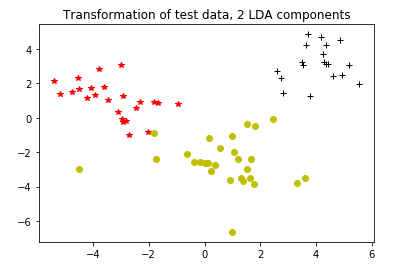

In [0]:
display(Image(filename='./LDA_pr.png'))

# We can see that the LDA projection is much better at preserving the class structure than PCA.